In [1]:
import rioxarray
import matplotlib.pyplot as plt
import numpy as np
import os

In [15]:
path = '../../_data/p-dengue/landscan'
os.listdir(path)

['landscan-global-2016.tif',
 'landscan-global-2017.tif',
 'landscan-global-2015.tif',
 'landscan-global-2023.tif',
 'landscan-global-2022.tif',
 'landscan-global-2020.tif',
 'landscan-global-2021.tif',
 'landscan-global-2019.tif',
 'landscan-global-2018.tif',
 'landscan-global-2024.tif']

In [21]:
# Path to your LandScan file (cropped Indonesia raster)
landscan_file = path + '/landscan-global-2023.tif'

# Load raster with rioxarray
pop = rioxarray.open_rasterio(landscan_file, masked=True)

In [22]:
pop

<xarray.DataArray (band: 1, y: 21600, x: 43200)> Size: 7GB
[933120000 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * y            (y) float64 173kB 90.0 89.99 89.98 ... -89.98 -89.99 -90.0
  * x            (x) float64 346kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

In [23]:
print(pop.rio.crs)

EPSG:4326


In [24]:
# Define Indonesia bounding box (xmin, ymin, xmax, ymax)
indonesia_bbox = [95, -11, 141, 6]  # degrees

# Crop raster
pop_idn = pop.rio.clip_box(*indonesia_bbox)

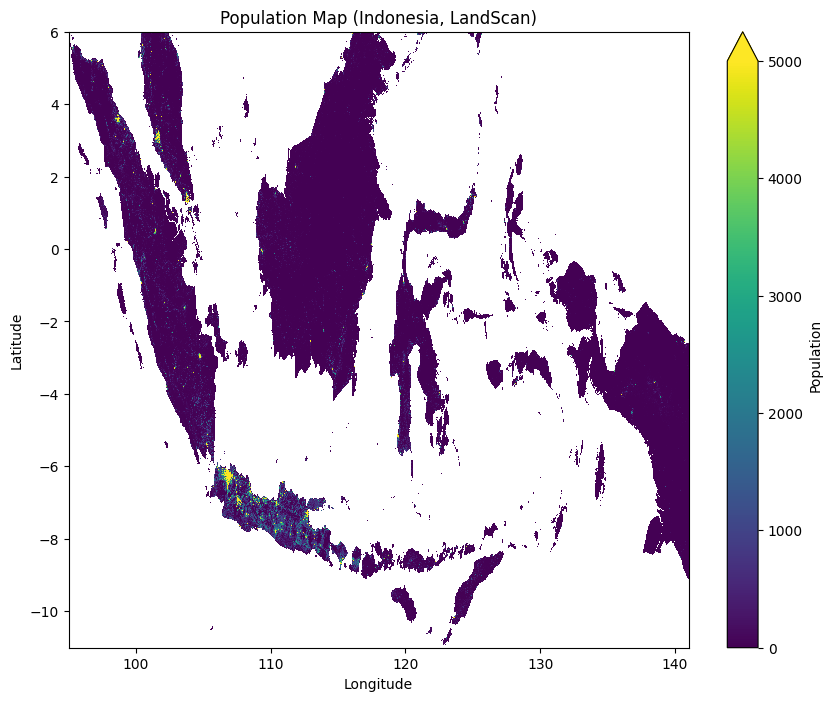

In [25]:
plt.figure(figsize=(10,8))
pop_idn.squeeze().plot(
    cmap="viridis",       # color map
    cbar_kwargs={'label': 'Population'},  # colorbar label
    vmin=0, vmax=5000     # optional: set limits to avoid outliers dominating
)
plt.title("Population Map (Indonesia, LandScan)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()